# Data Analysis & Regularized Linear Regression 

#### In this kernel, I summed up everything I've learnt to understand this competetion and solve the problem. You will learn from this kernel how to visualize, clean and prepare the data to train you machine leanrnig model, and even select the best model for the problem with the help of the learning curves.

#### Well, what then? we need to predict the house prices and all what we have is the data! So, let's look at it to familiarize ourselves and know what is needed to be done to prepare the data for the machine learning part. 

**Get motivated and believe me after this kernel you will have superpowers!... along with some fun! **

Let's import first some libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy.stats import skew

And load the data which is splitted into two files, one for** trianing** and another for **testing**.

In [2]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')

Nice, we have the data. Let's have a quick look at it.

In [3]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


So, we now know a little bit about our data(contains **categorical features**), and need to go deep! Let's get more info about our features(columns).

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We have 81 features(columns) of types object(43), int(35), and float(3), and with a closer look you will notice that some of them have missing values(the non- null values aren't 1460). So, along with the **categorical columns**, we will need to handle the **missing values**.

Let's see how our target variable, **SalePrice**,  is correlated with some other varibles in our data.

In [5]:
#the correlation matrix
corr_mat = X_train.corr()
corr_mat['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Awesome! let's pick the some of the **highly correlated** columns with our **SalePrice** column,  then have a scatter party, where we drink **outliers**! 


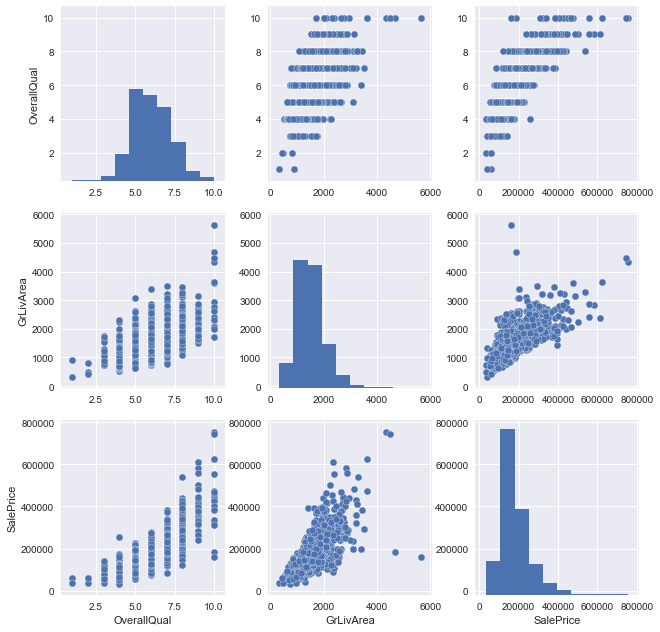

In [6]:
#get the variables that have a good correlation(>.7) with the target
values = list(corr_mat['SalePrice'].values)
keys = list(corr_mat['SalePrice'].keys())
variables = [i for i in keys if values[keys.index(i)] > .7]

#ploting scatters 
sns.set()
sns.pairplot(X_train[variables],size=3)
plt.show()

Lots of figurs? Not really LOL. 

Don't get lost. Look at the** 3rd row, the plot in the middle** represents the scatter** between 'SalePrice', 
and 'GrLivArea'.** Noticed something? the two points** between 4000 and 6000 on the x-axis**? these two points probably think they are diffrent
or even smarter from their mates, but they had a bad end. They were sold with a** low price** althoug they claim they are** big areas(houses)**!  
So, we can't have such arrogant points in our data! They do not even go with the flow like the other two points in the top right of the graph. We will delete them! why? because **outliers** cause problems when applying **statistical tests**('regression; in this problem), and they are probably errors.

In [7]:
X_train.drop(X_train[(X_train['GrLivArea']>4000) & (X_train['SalePrice']<300000)].index, inplace=True)

Well, that's not everything you get from these scatters. Look at the **skewed** data( 3rd row, top right). Wait! Lets Look at it closely.

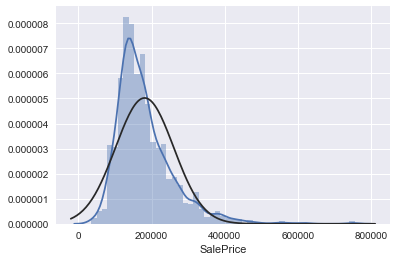

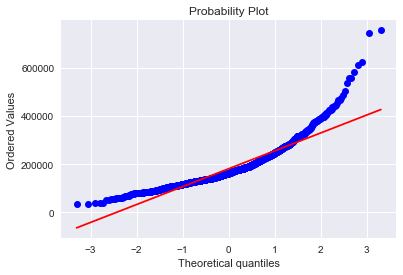

In [8]:
sns.distplot(X_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(X_train['SalePrice'], plot=plt)
plt.show()

The **skewed data **has no justice! it either gives more money(points) to the people of the East or the West! it gives one, 
and abuse another. Such injustice! We will force it to spread its points equally using some sort of powers(**Log Transformation**).

Hmm, you think we're nice, right? No, Not really. We did this for our problem's sake(**regression**) Since This can be valuable both 
for making patterns in the data more interpretable, and for helping to** meet the assumptions** of some statistical test(Regression).

Yay! we're done!...knowing how to clean our data for a machine learning model!

Here what we're gonna do:
 
*  **Handling the missing data.**
*  **Transforming the data with Log.**
*  **Getting Dummy variables. **

Before we carry on, let's delete our target **SalePrice**, and the **Id** column and save them for later, and concatenate the training data and test data
together for a bit.

In [9]:
#saving the labels of our target variable 
y = X_train['SalePrice']

#save the id column for later.
test_id = X_test['Id']

#dropping column that will not be needed when training our model.
X_train.drop('SalePrice', 1, inplace=True)
X_train.drop("Id", axis = 1, inplace = True)
X_test.drop("Id", axis = 1, inplace = True)

#save indexes before concatenating
X_train_idx = X_train.shape[0]
X_test_idx = X_test.shape[0]

#concatenate the data
data = pd.concat((X_train,X_test)).reset_index(drop=True)
print('Train index: %s \nTest index: %s \nShape of our whole data(rows,columns): %s'%(X_train_idx, X_test_idx, data.shape))

Train index: 1458 
Test index: 1459 
Shape of our whole data(rows,columns): (2917, 79)


Very good!

Now we handle the **missing data**.

In [10]:
#print the sum of the missing values of a column from the highest to the lowest.
numeric_cols = []
non_numeric_cols = []
for key,val in data.isnull().sum().sort_values(ascending=False).items():
    if val > 0:
        print(key, val, data[key].dtype)
        if data[key].dtype != 'object':numeric_cols.append(key)
        elif data[key].dtype == 'object':non_numeric_cols.append(key)
        

PoolQC 2908 object
MiscFeature 2812 object
Alley 2719 object
Fence 2346 object
FireplaceQu 1420 object
LotFrontage 486 float64
GarageCond 159 object
GarageQual 159 object
GarageYrBlt 159 float64
GarageFinish 159 object
GarageType 157 object
BsmtCond 82 object
BsmtExposure 82 object
BsmtQual 81 object
BsmtFinType2 80 object
BsmtFinType1 79 object
MasVnrType 24 object
MasVnrArea 23 float64
MSZoning 4 object
BsmtHalfBath 2 float64
Utilities 2 object
Functional 2 object
BsmtFullBath 2 float64
BsmtFinSF2 1 float64
BsmtFinSF1 1 float64
Exterior2nd 1 object
BsmtUnfSF 1 float64
TotalBsmtSF 1 float64
Exterior1st 1 object
SaleType 1 object
Electrical 1 object
KitchenQual 1 object
GarageArea 1 float64
GarageCars 1 float64


Well, it seems that some of the columns are **numeric** and others not so, let's look at the **non-numeric** first.

In [11]:
features = data.isnull().sum().sort_values(ascending=False).keys()
missing_values = pd.DataFrame(data[numeric_cols])
missing_values.head()

,LotFrontage,GarageYrBlt,MasVnrArea,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GarageArea,GarageCars
0,65.0,2003.0,196.0,0.0,1.0,0.0,706.0,150.0,856.0,548.0,2.0
1,80.0,1976.0,0.0,1.0,0.0,0.0,978.0,284.0,1262.0,460.0,2.0
2,68.0,2001.0,162.0,0.0,1.0,0.0,486.0,434.0,920.0,608.0,2.0
3,60.0,1998.0,0.0,0.0,1.0,0.0,216.0,540.0,756.0,642.0,3.0
4,84.0,2000.0,350.0,0.0,1.0,0.0,655.0,490.0,1145.0,836.0,3.0


We will fill the missing values for **BsmtHalfBath, BsmtFullBath, BsmtFinSF2, GarageCars** with zero because I can see that some of the 
instances have zero also which mean that instance(house) has no value for that feature(Bsmt)

We fill the missing values for **GarageArea,TotalBsmtSF, MasVnrArea, GarageYrBlt, BsmtFinSF1, LotFrontage, BsmtUnfSF** with the median of each column since the missing
value could've just been a close number to its friends.

In [12]:
fill_zero_cols = ['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'GarageCars']
fill_median_cols = ['GarageArea','TotalBsmtSF', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'BsmtUnfSF', 'GarageYrBlt']
[data[i].fillna(0,inplace=True) for i in fill_zero_cols]
[data[j].fillna(data[j].median(),inplace=True) for j in fill_median_cols];


Time to fill in the **non-numeric **ones.

In [13]:
features = data.isnull().sum().sort_values(ascending=False).keys()
missing_values = pd.DataFrame(data[non_numeric_cols])
missing_values.head()

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageCond,GarageQual,GarageFinish,GarageType,BsmtCond,...,BsmtFinType1,MasVnrType,MSZoning,Utilities,Functional,Exterior2nd,Exterior1st,SaleType,Electrical,KitchenQual
0,NaN,NaN,NaN,NaN,NaN,TA,TA,RFn,Attchd,TA,...,GLQ,BrkFace,RL,AllPub,Typ,VinylSd,VinylSd,WD,SBrkr,Gd
1,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,TA,...,ALQ,None,RL,AllPub,Typ,MetalSd,MetalSd,WD,SBrkr,TA
2,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,TA,...,GLQ,BrkFace,RL,AllPub,Typ,VinylSd,VinylSd,WD,SBrkr,Gd
3,NaN,NaN,NaN,NaN,Gd,TA,TA,Unf,Detchd,Gd,...,ALQ,None,RL,AllPub,Typ,Wd Shng,Wd Sdng,WD,SBrkr,Gd
4,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,TA,...,GLQ,BrkFace,RL,AllPub,Typ,VinylSd,VinylSd,WD,SBrkr,Gd


Okay, so most of these features are yes-no questions, for instance, to fill the missing values for the feature 'PoolQC' you have 
to ask yourself this question '**Does the following house have a pool?**'. Therefore, We're gonna fill the** missing values** with 'none'
meaning that the following house doesn't have that feature. Fun! Let's none these values.

In [14]:
data.fillna('none', inplace=True)

That was super fast LOL. Let's check again to make sure we don't have missing values.

In [15]:
data.isnull().sum().sort_values(ascending=False)

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
                ..
ScreenPorch      0
GarageFinish     0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
GarageCars       0
GarageYrBlt      0
CentralAir       0
FullBath         0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
GarageType  

Hip hip! we're are done. NO MISSING VALUES! Now, we take care of our categorical columns.

Time to bring justice to the East and West of our data, and handle the skewed data with the** Log** power! 

In [16]:
#transforming our target labels(SalePrice).
y = np.log1p(y)
#transfomring the numeric features 
numeric_feats = data.dtypes[data.dtypes != "object"].index
skewed_feats = X_train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
data[skewed_feats] = np.log1p(data[skewed_feats])

We're finally have our data ready for our models, but we need to **get_dummies** for our **categorical features** first because the models need numbers not categories.

For Example, the feature 'PoolQC' is a categorical feature. it's filled with 4 values, (Ex, none,..etc)  when we get dummies for it. the following will happen:

In [17]:
pd.get_dummies(data['PoolQC']).head()

,Ex,Fa,Gd,none
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


As you see above, each category will be a column(feature) and will be 1 if the following instance has that feature and 0 if it has not.
So, let's do this to all the data.

In [18]:
data = pd.get_dummies(data)

**Models**

We've arrived safely to the second part. Congrats!

Time to seprate out train and test set since we're done processing the data.

In [19]:
X_train = data[:X_train_idx]
X_test = data[X_train_idx:] 

Let's import here some needed libraries.

In [20]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

We're going to train a lasso model.** Lasso** is simply a regularized linear regression model. Lasso also selects
the most important features, so it does the** feature selection** process for us. Then we will evaluate it using cross validation, and look at some learning curves as well.

In [21]:
#our cross function
def display_scores(scores):
    print("Score:{:.4f}".format(scores.mean()))
#learning curves function 
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

Let's train our **lasso model** and see how it will **score**.

In [22]:
lasso = Lasso(alpha=10).fit(X_train,y)
scores = cross_val_score(lasso,X_train,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Score:0.2650


Well, not a bad score for the first attempt! Let's fine-tune the model and look at the **learning curve**.

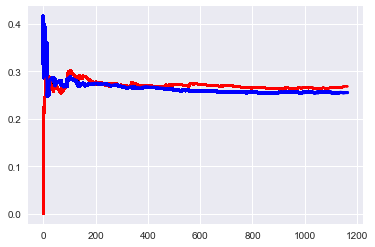

In [23]:
plot_learning_curves(lasso,X_train,y)
plt.show()

This time we trained our model with a** big alpha**(learning rate), so in our learning curve you see that our model is not fitting
the data well(the red line represents the train set, and it tells us whether our model is** overfitting or underfitting** the data).

The red line starts with error 0, meaning that our model fits the data well when it starts with some instances, but when it's given more instances,  it underfits the data. 

The blue line shows how our model generalizes on the validation set, data it's never seen before. Also, in our curve we a big error on the validation set. So, our model performs poorly both on the training set and the validation set.

This happed beacuse the alpha the we trained our lasso model with is big. Alpha is resposible for this '**how much you want to regularize your model?**', so the bigger alpha, the more you model will decrease the features'coefficients to zero, and the model will be have then less features that will make it a **high bias model** or just simple model, model cannot fit the data.****

Let's train our model with very** small alpha** and see what get.

In [24]:
lasso = Lasso(alpha=.0005).fit(X_train,y)
scores = cross_val_score(lasso,X_train,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Score:0.1103


WOW! it improved! Let's look at the learning curve, hurry up! 

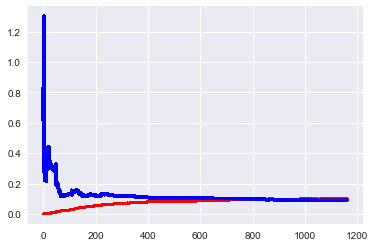

In [25]:
plot_learning_curves(lasso,X_train,y)
plt.show()

Okay, now our model fits and generalizes better. Still we have an error on both the training set and the validation set that can
be improved **by feeding our model with more instances, features, or training a more complex model**. 

Now, lets predict the prices and save them into a file to be submitted.

In [26]:
preds = lasso.predict(X_test)
prediction = pd.DataFrame(np.exp(preds), test_id, columns=['SalePrice']).to_csv('predictions.csv')

The kernel is over! I had fun writing this kernel and learned a lot. I hope you did as well. 

If you want more if this, go check these kernels as well because they are really good and helped me a lot.

*  [stacked-regressions-top-4-on-leaderboard](http://https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) 
* [comprehensive-data-exploration-with-python](http://https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

Thank you! 
